# 뉴스 요약봇 만들기


## 텍스트 요약 (Text Summarization)이란?

![img](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-21-1.png)

텍스트 요약(Text Summarization)이란 위 그림과 같이 긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary) 문장들로 변환한 것을 말합니다. 예를 들어 상대적으로 큰 텍스트인 뉴스 기사로 작은 텍스트인 뉴스 제목을 만들어내는 것이 텍스트 요약의 대표적인 예라고 할 수 있습니다.

이 때 중요한 것은 요약 전후에 정보 손실 발생이 최소화 되어야 한다는 점입니다. 이것은 정보를 압축하는 과정과 같습니다. 비록 텍스트의 길이가 크게 줄어들었지만, 요약문은 문서의 원문이 담고 있는 정보를 최대한 보존하고 있어야 합니다. 이것은 원문의 길이가 길수록 만만치 않은 어려운 작업이 됩니다. 사람이 이 작업을 수행한다 하더라도 긴 문장을 정확하게 읽고 이해한 후, 그 의미를 손상하지 않는 짧은 다른 표현으로 원문을 번역해 내야하는 것입니다.

그렇게 요약 문장을 만들어 내려면 어떤 방법을 사용하는 것이 좋을까요? 여기서 텍스트 요약은 크게 **추출적 요약(Extractive Summarization)**과 **추상적 요약(Abstractive Summarization)**의 두가지 접근으로 나누어볼 수 있습니다.

### 추출적 요약 (Extractive Summarization)

첫 번째 방식인 추출적 요약은 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식입니다. 가령, 10개의 문장으로 구성된 텍스트가 있다면 그 중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식입니다. 그런데 꺼내온 3개의 문장이 원문에서 중요한 문장일 수는 있어도, 3개의 문장의 연결이 자연스럽지 않을 수 있습니다. 결과로 나온 문장들 간의 호응지 자연스럽지 않을 수 있다는 것이죠. 딥러닝보다는 주로 전통적인 머신 러닝 방식에 속하는 텍스트랭크([TextRank](https://www.aclweb.org/anthology/W04-3252.pdf))와 같은 알고리즘을 사용해서 이 방법을 사용한다고 합니다.

이런 방식을 이미 서비스에 도입해서 활용하고 있는 사례가 있습니다. 가장 대표적인 것이 네이버 뉴스의 요약봇입니다. 

![img](http://img.hani.co.kr/imgdb/resize/2017/1210/00501972_20171210.JPG)

[네이버 뉴스](https://news.naver.com/)에 접속해서 아무 뉴스 기사나 클릭하면 제목 우하단에 `요약봇` 버튼이 있습니다. 기사 원문을 요약한 글을 보실 수 있으실 겁니다. 가끔 세 문장간 연결이 조금 매끄럽지 않게 느껴질때도 있지만 꽤 그럴듯한 요약문을 보이고 있습니다. 위에서 소개한 TextRank 알고리즘을 통해 해당 기사를 가장 잘 대표하는 단어들로 이루어진 핵심 문장을 아주 효과적으로 찾아내기 때문입니다. 잘 찾아보면 요약문에 사용된  문장 3개가 원문에 그대로 있다는 것을 알 수 있을 것입니다.

### 추상적 요약(Abstractive Summarization)

두 번째 방식인 추상적 요약은 추출적 요약보다 좀 더 흥미로운 접근을 사용합니다. 원문으로부터 내용이 요약된 *새로운 문장을 생성*해내는 것이죠. 여기서 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일수도 있다는 것을 의미합니다. 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역인 셈입니다. 반면, 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심 문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼 수 있을 것입니다.

자연어 생성하면 떠오르는 신경망들이 있습니다. RNN.. LSTM.. 

그저 RNN을 이용해 Language Generation을 한다고 해서 긴 문장을 읽고 나서 요약문을 뚝딱 만들어내긴 어렵습니다.  한번 아래 기사를 가볍게 읽고 다음으로 넙어가봅시다.

- [구글 인공지능, "뉴스 제목도 잘 뽑네"](https://zdnet.co.kr/view/?no=20160905114833&from=Mobile)



## 인공 신경망으로 텍스트 요약 훈련시키기

우리는 seq2seq 모델을 통해서 Abstractive summarization 방식의 텍스트 요약기를 만들어 볼 것입니다. seq2seq는 두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해내는 자연어 생성 모델입니다. 주료 뉴럴 기계 번역에 사용되는 이 모델이 텍스트 요약에도 사용할 수 있다니 조금 새로비만, 원문을 요약문으로 번역한다고 생각하면 전혀 무리가 없겠죠?

### seq2seq 개요

![Img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-21-2.max-800x600.png)

원문을 첫번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환합니다. 이 벡터를 문맥 정보를 가지고 있는 벡터라 하여 컨텍스트 벡터(context vector)라고 합니다. 두번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성합니다.

### LSTM과 컨텍스트 벡터

우리는 seq2seq를 구현할 때, 인코더/디코더로 바닐라 RNN이 아니라 LSTM을 사용할 것입니다.

![Img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-21-3.max-800x600.png)

LSTM이 바닐라RNN과 다른 점은 다음 time step의 셸에 hidden state 뿐만 아니라 cell state도 함께 전달한다는 점입니다. 다시 말해, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state h와 cell state c 두 개의 값 모두 존재해야 한다는 뜻입니다.

### 시작 토큰과 종료 토큰

![img](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-21-4.png)

seq2seq 구조에서 디코더는 시작 토큰 SOS가 입력되면 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 EOS를 예측하는 순간까지 멈추지 않습니다. 다시 말해 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야하는지 알려줄 필요가 있습니다.

### 어텐션 메커니즘을 통한 새로운 컨텍스트 벡터 사용하기

![img](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-21-5.png)

우리는 기존에 배운 seq2seq를 수정하고, 새로운 모듈을 붙여 모델의 성능을 높여볼 것입니다. 기존의 seq2seq는 **인코더의 마지막 time step의 hidden state**를 컨텐스트 벡터로 사용했습니다. 하지만 RNN 계열의 인공 신경망(바닐라 RNN, LSTM, GRU)의 한계로 인해 이 컨텍스트 정보에는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태가 됩니다.

**어텐션 메커니즘(Attention Mechanism)**은 이와 달리, **인코더의 모든 step의 hidden state의 정보**가 컨텍스트 벡터에 전부 반영이 되도록 하는 것입니다. 하지만 인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더가 *현재 time step*의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식입니다.

위의 그림을 예로 들자면, seq2seq 모델이라면 디코더로 전달되는 인코더의 컨텍스트 벡터는 인코더의 마지막 스텝의 hidden state인 $h_5$가 되겠지만 어텐션 메커니즘이 적용된 seq2seq인 Attentional seq2seq이라면 인코더의 컨텍스트 벡터는 예를 들어 $0.2h_1 + 0.3h_2 + 0.15h_4 + 0.25h_5$가 될 수도 있는 것입니다.

여기서 주의해야 할 것은, 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 **디코더의 현재 스텝이 어디냐에 따라 계속 달라진다**는 점입니다. 즉, 디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것입니다. 이와 달리, 기본적인 seq2seq 모델에서 컨텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정 값을 가집니다.

이렇게 디코더의 현재 스텝에 따라 동적으로 달라지는 인코더의 컨텍스트 벡터를 사용해서 현재의 예측을 활용하면, 디코더가 좀 더 정확한 예측을 할 수 있게 됩니다. 이러한 Attention 기법은 seq2seq를 비록하여 향후 딥러닝 분야를 획기적으로 발전시킨 개념이 됩니다. 특히 자연어처리 분야에서는 두말할 것도 없겠죠? 아직은 Attention 개념이 명확하게 와닿지 않을지라도 앞으로도 수차례에 걸쳐 이 개념에 대해 더욱 깊이있게 다루게 될 것입니다.

지금까지의 내용을 정리해봅시다.

1. seq2seq를 사용한다.
2. RNN 계열 중 LSTM을 사용해야 하므로 hidden state 뿐만 아니라 cell state도 사용해야 합니다.
3. 디코더의 예측 시퀀스에는 시작 토큰 SOS와 예측 토큰 EOS를 시퀀스의 앞, 뒤로 붙입니다.
4. seq2seq를 구동시키면 디코더는 시작 토큰을 입력받아 예측을 시작합니다.
5. seq2seq 기본 모델과 달리, 어텐션 메커니즘을 이용해 인코더의 hidden state의 중요도를 취합한 컨텍스트 벡터를 디코더 스텝별로 계산합니다.
6. 계산된 컨텍스트 벡터를 이용해서 디코더는 다음 등장할 단어를 예측합니다.


## 데이터 준비하기

이제 데이터를 준비해봅시다. 오늘 우리가 텍스트 요약 모델 학습에 사용할 데이터셋은 kaggle에서 제공된 **아마존 리뷰 데이터셋**입니다.

<https://www.kaggle.com/snap/amazon-fine-food-reviews>

위 링크에서 `Reviews.csv`파일을 다운로드 받아 `./data` 폴더로 이동해주세요. 

이번 실습에서는 NLTK의 불용어(stopworkds)를 사용할 것입니다. NTLK와 NLTK의 데이터셋이 설치되어있지 않다면 아래 명령어로 우선 NLTK를 설치하고 NTLK의 데이터셋을 다운로드해주세요. 

NLTK는 Natural Language Toolkit의 축약어로, 영어기호, 통계, 자연어 처리를 위한 라이브러리입니다. 이 NLTK애는 I, my, me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만 의미를 분석하고 요약하는 데에는 거의 의미가 없는 100여개의 불용어가 미리 정의되어 있습니다. 이를 이용해 다운로드받은 리뷰 파일에서 불용어를 제거하는 작업을 진행할 예정입니다.

```bash
$ pip install nltk
```

nltk 패키지에서 불용어 사전을 다운로드 받고, 데이터 전처리를 위한 나머지 패키지도 함께 불러와봅시다.

In [1]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aiffel0039/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

링크에서 다운로드 받은 데이터(Reviews.csv)는 총 568,454개의 샘플을 가지고 있습니다. 시간상 여기서는 모든 샘플을 사용하지는 않고 간단히 10만개의 샘플만 사용해보겠습니다. 데이터 파일의 경로를 수정하는 것을 잊지마세요.

In [4]:
file_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/Reviews.csv'
data = pd.read_csv(file_path, nrows=100000)
print("전체 샘플 수 :", len(data))

전체 샘플 수 : 100000


In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


데이터는 이렇게 되어있습니다. 사실 전체 데이터 중 Summary 열과 Text 열만 훈련에 사용할 거라, 이 두개의 열만 별도로 저장하고 다시 출력해봅시다.

In [6]:
data = data[['Text', 'Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [7]:
# 랜덤한 3개 샘플 출력
data.sample(15)

,Text,Summary
95807,"This cereal is pretty good, as far as healthy(...",Too much bland chocolate
91445,I wrote a similar review for the other Peace c...,"Just ok, too much sugar. Not organic"
39006,For anyone who remembers those fudgy little co...,Closest thing to 70s Girl Scout Fudge Patties ...
3058,My synagogue's Passover Care Package had some ...,Passover treat
76276,I love Jasmine tea! More than anyone trust me....,The Best of the Best!
40526,i ordered this tea to produce more breastmilk ...,horrible taste & stinky
55165,I found this food in one local supermarket; ho...,Wonderful product for cats
43349,the product I ordered was not the product that...,misleading
852,I'm happy with the quality of the product and ...,"Good oatmeal, I'm on my second bag"
59882,I have found this to be a nice alternative to ...,"tasty, but don't expect to lose weight"


## 데이터 전처리 하기 (1) - 데이터 정리하기

이제 데이터를 불러왔으니 전처리를 진행해봅시다. 빈칸으로 존재하는 Null 데이터, 의미는 같지만 다른 식으로 작성된 글같은 중복 항목과 같은 학습할 때 방해가 되는 데이터를 먼저 솎아낼 것입니다.

### 중복 샘플과 NULL값이 존재하는 샘플 제거

우선 데이터의 중복 샘플 유무를 확인해볼게요.

In [8]:
print("Text 열에서 중복을 배제한 유일한 샘플의 수 :", data['Text'].nunique())
print("Summary 열에서 중복을 배제한 유일한 샘플의 수 :", data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


중복을 제외한다면 Text에는 88,426개, Summary에서는 72,348개의 유니크한 데이터가 존재합니다. 사실 이 데이터의 Summary는 'Smelly'나 'Good Product'와 같이 아주 간단한 요약들도 많아서 Text가 달라도 Summary는 동일할 수 있습니다. 하지만 Text 자체가 중복이 된 경우는 중복 샘플이므로 제거해야겠죠.

데이터 프레임의 `drop_duplicates()`를 사용하면 손쉽게 중복 샘플을 제거할 수 있습니다.

In [9]:
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플 수 :", len(data))

전체 샘플 수 : 88426


중복이 제거되면서 샘플 수가 88,426개로 줄어들었습니다. 그런데 만약 데이터 Null 값을 가지는 샘플이 있었다면, `drop_duplicates()`가 중복된 Null들을 지워주기는 하겠지만 여전히 Null 값 한개가 어딘가에 남아있을 수 있습ㄴ디ㅏ. 데이터에 Null값이 남아있는지 보겠습니다.

데이터 프레임에 Null값이 있는지 확인하는 방법은 `.isnull().sum()`을 사용하면 됩니다.

In [10]:
data.isnull().sum()

Text       0
Summary    1
dtype: int64

Summary에 1개의 Null값이 있습니다. 데이터프레임에서 Null값을 제거할 때에는 `dropna()` 함수를 사용하면 됩니다.

In [11]:
data.dropna(axis=0, inplace=True)
print("전체 샘플 수:", len(data))

전체 샘플 수: 88425


전체 샘플 수가 88.425개가 되었습니다. 지금까지 중복 샘플과 Null 값이 있는 샘플들을 제거해보았는데 10만개의 샘플 중 1만개 이상의 샘플이 제거되었습니다.


### 텍스트 정규화와 불용어 제거

살아남은 샘플에는 수많은 단어가 있습니다. 그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있습니다.

예를들어 'it'll'은 'it will'과 같고, 'mustn't'과 'must not'은 같은 표현입니다. 이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법입니다.

이러한 방법론을 텍스트 처리에서는 **텍스트 정규화(text normalization)**이라고 합니다.

여기서는 텍스트 정규화를 위한 사전(dictionary)를 아래와 같이 구성할 것입니다. 이 사전은 [링크](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)를 참고하여 만들었습니다. 

In [12]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ",len(contractions))

정규화 사전의 수:  120


정규화를 마쳤습니다.

하지만 아직 끝나지 않았습니다. 일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별로 도움이 되지 않는 단어들이 존재합니다. 이를 불용어(stopwords)라고 합니다. 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법이 됩니다. 여기서는 NLTK에서 제공하는 불용어 리스트를 참조해 샘플에서 불용어를 제거할 것입니다.

In [13]:
print("불용어의 개수 : ", len(stopwords.words('english')))
print(stopwords.words('english'))

불용어의 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 

NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179개입니다. 이를 사용하여 불용어를 제거할거에요. 이 작업 외에도 모든 영어문자는 소문자로 만들고, 섞여있는 html 태그를 제거하고 정규표현식을 사용해 각종 특수문자를 제거해 정말 필요한 내용만 학습할 수 있도록 처리하겠습니다.

함수의 하단을 보면, NLTK를 이용해 불용어를 제거하는 파트가 있는데, 이른 Text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 Summary 전처리를 할 때에는 호출하지 않을 예정입니다. Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 summary에는 남아있는 것이 더 좋을 것 같습니다. 이 처리를 위해 함수의 인자로 remove_stopwords를 추가하고 if문을 더해주었습니다.

In [16]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, 'lxml').text # html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    
    return tokens

한번 그럼 테스트를 해봅시다.

In [17]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


결과를 보면 모든 알파벳이 소문자로 변환되고, html 태그도 제거되었습니다. 또한 (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있습니다. 특수문자도 제거되면서 영어만 남았습니다.

이제 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행해봅시다. 이때 Text의 경우에는 불용어를 제거하고, Summary의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행해야 합니다. 먼저 Text를 전처리하고 결과를 확인하기 위해서 상위 5개 줄을 출력해봅시다.

In [19]:
clean_text = []

# 전체 Text 데이터에 대한 전처리 : 꽤 오래 걸릴 수 있습니다.
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

NameError: name 'clean_test' is not defined

In [20]:
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

이제 Summary에 대해서 전처리 함수를 호출할 때는, 불용어 제거를 수행하지 않는다는 의미에서 두번째 인자로 False를 넣어주겠습니다.

In [21]:
clean_summary = []

# 전체 Summary 데이터에 대한 전처리 -> 5분 이상의 시간이 걸릴 수 있습니다.
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, False))

/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [22]:
clean_summary[:5]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

이렇게 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋습니다. 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있습니다. 이렇게 되면 샘플 자체가 빈값을 가지게 됩니다.

보다 쉽게 확인하기 위해서 데이터들을 데이터프레임에 재저장하겠습니다. 그리고 빈(empty) 값을 가진 샘플들이 있다면 모두 Null값을 가진 샘플로 대체하겠습니다.

In [23]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [25]:
data.isnull().sum()

Text        0
Summary    70
dtype: int64

Summary 열에서 70개의 Null값이 생겼습니다. 원래는 단어가 있었는데, 정제 과정에서 모든 단어가 제거되어 빈 샘플이 70개나 생겼다는 의미입니다. 이 샘플들은 모두 제거해주겠습니다.

In [26]:
data.dropna(axis=0, inplace=True)
print('전체 샘플 수 :', len(data))

전체 샘플 수 : 88355


## 데이터 전처리하기 (2) - 훈련 데이터와 테스트 데이터 나누기

학습을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고 문장의 시작과 끝을 표시해줘야 합니다.

### 샘플의 최대 길이 정하기

필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차럐입니다.

Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 보겠습니다.

In [28]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print("텍스트의 최소 길이 : ", np.min(text_len))
print("텍스트의 최대 길이 : ", np.max(text_len))
print("텍스트의 평균 길이 : ", np.mean(text_len))
print("요약의 최소 길이 : ", np.min(summary_len))
print("요약의 최대 길이 : ", np.max(summary_len))
print("요약의 평균 길이 : ", np.mean(summary_len))

텍스트의 최소 길이 :  2
텍스트의 최대 길이 :  1235
텍스트의 평균 길이 :  38.792428272310566
요약의 최소 길이 :  1
요약의 최대 길이 :  28
요약의 평균 길이 :  4.010729443721352


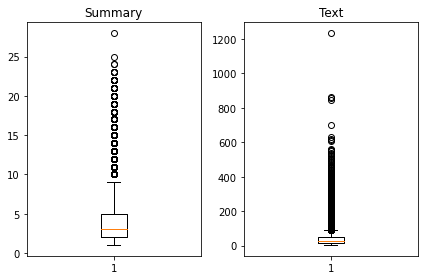

In [29]:
plt.subplot(1, 2, 1)
plt.boxplot(summary_len)
plt.title("Summary")

plt.subplot(1, 2, 2)
plt.boxplot(text_len)
plt.title("Text")
plt.tight_layout()

plt.show()

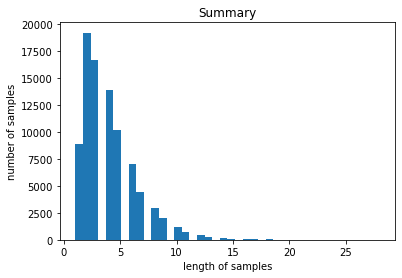

In [30]:
plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

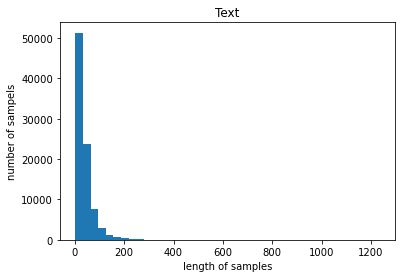

In [31]:
plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of sampels')
plt.show()

위의 그래프처럼 많은 양의 데이터를 다룰 때에는 데이터를 시각화하여 보는 것이 도움이 됩니다. 위에서 부터 차례대로 그래프는 각각의 요약과 실제 텍스트의 길이 분포, 요약본 샘플 길이별 갯수, 실제 텍스트 샘플 길이별 갯수를 나타내고 있습니다.

Text의 경우 최소 길이가 2, 최대 길이가 1,235으로 그 차이가 굉장히 급니다. 하지만 평균 길이는 38로 시각화된 그래프로 봤을 때에는 대체적으로 100 내외의 길이를 가진다는 것을 확인할 수 있습니다.

Summary의 경우 최소 길이가 1, 최대 길이가 28, 그리고 평균 길이가 4로 Text에 비해 상대적으로 길이가 매우 짧습니다. 그래프로 봤을 때에도 대체적으로 10 이하의 길이를 가지고 있습니다.

이로부터 text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정해봅시다.

In [32]:
text_max_len = 50
summary_max_len = 8

각각 50과 8로 정했는데 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인하는 편이 객관적으로 깅리를 결정하는 데 도움이 될 것입니다. 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수를 만들어서 좀 더 정확하게 판단해보겠습니다.

In [34]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if len(s.split()) <= max_len:
            cnt = cnt + 1
    print("전체 샘플 중 길이가 {} 이하인 샘플의 비율 : {}".format(max_len, (cnt/len(nested_list))))

In [35]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율 : 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율 : 0.9424593967517402


각각 50과 8로 패딩을 하게되면 해당 길이보다 긴 샘플들은 내용이 잘리게 되는데, Text 열의 경우에는 약 23%의 샘플들이 내용이 망가지게 된다고 합니다.

우리는 정해진 길이에 맞춰 자르는 것이 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제하겠습니다.

In [36]:
data = data[data['Text'].apply(lambda x : len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x : len(x.split()) <= summary_max_len)]
print("전체 샘플 수 : ", len(data))

전체 샘플 수 :  65818


### 시작 토큰과 종료 토큰 추가하기

앞서 시작 토큰과 종료 토큰에 대해서 언급했습니다. 디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고 종료 토큰을 예측한 순간에 문장 생성을 멈추는 것이었습니다.

![Img](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-21-4.png)

seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있습니다. 이번 실습에서는 시작 토큰은 `sostoken`, 종료 토큰은 `eostoken`이라고 임의로 명명하고 앞, 뒤로 추가하겠습니다. 디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 `decoder_input`, 디코더의 출력 또는 레이블에 해당하면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 `decoder_target`이라고 이름을 정하겠습니다. 두 개의 문장 모두 Summary 열로부터 만들겠습니다.

In [37]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken ' + x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


앞뒤로 토큰이 잘 붙었습니다.

인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장해주겠습니다.

In [38]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

이제 훈련 데이터와 테스트 데이터를 분리하겠습니다.

훈련 데이터와 테스트 데이터를 분리하는 방법은 분리 패키지를 사용하는 방법, 또는 직접 코딩을 통해서 분리하는 방법 등 여러가지 방법이 있을텐데 여기서는 직접 해보도록 하겠습니다. 우선, `encoder_input`과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어주겠습니다.

In [42]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[41143 15392   901 ... 18812 39111 52249]


이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해주면 잘 섞인 샘플이 됩니다.

In [43]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

이제 섞인 데이터를 8:2 비율로 훈련 데이터와 테스트 데이터로 분리해주겠습니다. 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해주겠습니다.

In [44]:
n_of_val = int(len(encoder_input) * 0.2)
print("테스트 데이터의 수 :", n_of_val)

테스트 데이터의 수 : 13163


이렇게 정의한 테스트 데이터의 갯수를 이용해 전체 데이터를 양분하겠습니다. ; 표기의 위치에 주의해주세요.

In [45]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print("훈련 데이터의 갯수 :", len(encoder_input_train))
print("훈련 레이블의 갯수 :", len(decoder_input_train))
print("테스트 데이터의 갯수 :", len(encoder_input_test))
print("테스트 데이터의 갯수 :", len(decoder_input_test))

훈련 데이터의 갯수 : 52655
훈련 레이블의 갯수 : 52655
테스트 데이터의 갯수 : 13163
테스트 데이터의 갯수 : 13163


## 데이터 전처리하기 (3) - 정수 인코딩


### 단어 집합 (vocaburary) 만들기 및 정수 인코딩

이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어주어야 합니다. 이를 위해서는 각 단어에 고유한 정ㅅ로 맵핑하는 작업이 필요해요. 이 과정을 **단어 집합(vocaburary)**을 만든다고 표현합니다. 훈련 데이터에 대해서 단어 집합을 만들어보겠습니다. 우선, 원문에 해당되는 `encoder_input_train`에 대해서 단어 집합을 만들겠습니다.

Keras의 토크나이저를 사용하면 입력된 훈련 데이터로부터 단어 집합을 만들 수 있습니다.

In [46]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

이제 단어 집합이 생성되는 동시에 각 단어에 고유한 점수가 부여되었습니다. 현재 생성된 단어 집합은 `src_tokenizer.word_index`에 저장되어있습니다. 그렇지만 우리는 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행하려고 합니다.

등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해보겠습니다. 

`src_tokenizer.word_counts.items()`에는 단어와 각 단어의 등장 빈도수가 저장되어져 있습니다. 이를 통해 통계적인 정보를 얻어봅시다.

In [47]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도 수가 threshold보다 작으면
    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
    

print("단어 집합(vocabulary)의 크기 : ", total_cnt)
print("등장 빈도가 {}번 이하인 희귀 단어의 수 : {}".format(threshold-1, rare_cnt))
print("단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : ", total_cnt - rare_cnt)
print("단어 집합에서 희귀 단어의 비율 : ", (rare_cnt/total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도의 비율 : ", (rare_freq/total_freq)*100)

단어 집합(vocabulary)의 크기 :  32037
등장 빈도가 6번 이하인 희귀 단어의 수 : 23792
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 :  8245
단어 집합에서 희귀 단어의 비율 :  74.26413209726253
전체 등장 빈도에서 희귀 단어 등장 빈도의 비율 :  3.381656219433666


encoder_input_train에는 총 32,037개의 단어가 있네요. 그 아래의 통계 정보들을 해석해볼까요?

등장 빈도가 threshold 값인 7회 미만, 즉, 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지하네요. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.38%밖에 되지 않아요.

그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 합니다. 위에서 이를 제외한 단어 집합의 크기를 8,233으로 계산했는데, 이와 비슷한 값으로 어림잡아 단어 집합의 크기를 8000으로 제한해볼게요. 토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있어요.

In [48]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) # 단어 집합의 크기를 8000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

`texts_to_sequences()`는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행합니다. 

현재 단어 집합의 크기를 8000으로 제한했으니까 이제 8000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않습니다.

In [49]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[75, 224, 697, 52, 229, 2, 68, 3, 3518, 2560, 4, 1056, 620, 4502, 1661, 2455, 2391, 697, 52, 224, 31, 19, 346, 15, 49, 588, 982, 45, 3878, 1930, 66, 101, 129, 27, 44, 17, 80, 603, 3878, 772, 1906, 1777, 193, 907, 46, 147, 115, 118, 43], [599, 338, 15, 3, 272, 1581, 366, 60, 6, 3, 1119, 987, 273, 304, 20, 91, 38, 180], [7, 2643, 1471, 2561, 274, 19, 45, 3, 5, 17]]


더이상 텍스트가 아닌 정수가 출력되고 있습니다.

Summary 데이터에 대해서도 동일한 작업을 수행하겠습니다. 케라스의 토크나이저를 사용하여 `decoder_input_train`을 입력을로 전체 단어 집합과 각 단어에 대한 빈도수를 계산합시다.

In [50]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었습니다. 이는 `tar_tokenizer.word_inex`에 저장되어있습니다. `tar_tokenizer.word_counts.items()`에는 단어와 각 단어의 등장 빈도수가 저장되어져있는데, 이를 통해서 통계적인 정보를 얻어서 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해봅시다.

In [51]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10616
등장 빈도가 5번 이하인 희귀 단어의 수: 8223
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2393
단어 집합에서 희귀 단어의 비율: 77.45855312735493
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.94233791960037


등장 빈소다 5회 이하인 단어들은 단어 집합에서 약 77%를 차지하고 있습니다. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.94%밖에 되지 않습니다. 아까 했던 것과 동일하게 이 단어들은 모두 제거하겠습니다. 

2393에서 어림잡아 2000을 단어 집합의 크기로 제한하겠습니다.

In [52]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)

decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환 되었는지 확인
print("input!")
print("input : ", decoder_input_train[:5])
print("output!")
print("ouput : ", decoder_target_train[:5])

input!
input :  [[1, 3, 25, 35, 30], [1, 181], [1, 154, 23, 383, 441, 38, 12], [1, 3, 21, 9, 6, 82, 5, 375, 348], [1, 5, 1393, 34, 268]]
output!
ouput :  [[3, 25, 35, 30, 2], [181, 2], [154, 23, 383, 441, 38, 12, 2], [3, 21, 9, 6, 82, 5, 375, 348, 2], [5, 1393, 34, 268, 2]]


정상적으로 정수 인코딩 작업이 끝났습니다. 현재 `decoder_input_train`과 `decoder_target_train`에는 더이상 숫자 2000이 넘는 숫자들은 존재하지 않습니다. 그런데 다음 작업인 패딩하기로  넘어가기 전에 한가지 점검해야 할 것이 있습니다.

전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있습니다. 이 현상은 길이가 상대적으로 길었던 원문(text)의 경우에는 문제가 별로 없겠지만, 애초에 평균 길이가 4밖에 되지 않았던 요약문(summary)의 경우에는 이 현상이 굉장히 두드러졌을 가능성이 높겠죠.

요약문에서 길이가 0이 된 샘플들의 인덱스를 받아와보겠습니다. 여기서 주의할 점은 요약문인 `decoder_input`에는 `sostoken` 또는 `decoder_target`에는 `eostoken`이 추가된 상태이고, 이 두 토큰은 모든 샘플에서 등장하므로 빈도수와 샘플수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않습니다. 그래서 이제 길이가 0이 된 요약문의 실제 길이는 1로 나올 것입니다. 길이가 0이 된 `decoder_input`에는 `sostoken`, `decoder_target`에는 `eostoken`만 남아있을 것입니다.

훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 `drop_train`과 `drop_test`라는 변수에 저장해보겠습니다.

In [54]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print("삭제할 훈련 데이터의 갯수 : ", len(drop_train))
print("삭제할 테스트 데이터의 갯수 : ", len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print("---")
print("훈련 데이터의 갯수 : ", len(encoder_input_train))
print("훈련 레이블의 갯수 : ", len(decoder_input_train))
print("테스트 데이터의 갯수 : ", len(encoder_input_test))
print("테스트 레이블의 갯수 : ", len(decoder_input_test))

삭제할 훈련 데이터의 갯수 :  0
삭제할 테스트 데이터의 갯수 :  0
---
훈련 데이터의 갯수 :  51364
훈련 레이블의 갯수 :  51364
테스트 데이터의 갯수 :  12835
테스트 레이블의 갯수 :  12835


훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있습니다. 

### 패딩하기

텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 서로 다른 길이의 샘플들을 병렬처리 하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 합니다. 아까 정해두었던 최대 길이로 패딩을 해 줄 것입니다. 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰주겠습니다.

In [55]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')

decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

## 모델 설계하기

이제는 모델을 설계할 시간입니다. 우선 함수형 API를 이용해서 인코더를 설계해보겠습니다.

In [58]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape = (text_max_len, ))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

임베딩 벡터의 차원은 128로 정의하고 hidden state의 크기를 256으로 정의했습니다. hidden state는 LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터입니다. 이 파라미터는 LSTM의 용량의 크기나 LSTM의 뉴런 갯수라고 생각하면 됩니다. 다른 신경망과 마찬가지로, 무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아닙니다.

인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였습니다. hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있습니다. 3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야겠죠?

디코더를 설계해보겠습니다.

In [63]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 lstm
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout=0.4, recurrent_dropout = 0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일합니다. 하지만 LSTM의 입력을 정의할 때 `initial_state`의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어주어야 합니다.

디코더의 출력층을 설계해보겠습니다.

In [64]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 128)      1024000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 50, 256), (N 394240      embedding_1[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

디코더의 출력층에서는 Summary의 단어장인 `tar_vocab`의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀어야 합니다. 그렇기 때문에 Dense의 인자로 `tar_vocab`을 주고, 활성화 함수로 소프트맥스 함수를 사용하고 있습니다.

지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq입니다. 그런데 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있습니다. 바로 위에서 말했던 어텐션 메커니즘입니다.

### 어텐션 메커니즘

어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야한다는 뜻입니다. 어텐션 함수를 설계하는 것은 다음으로 미루고, 여기서는 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 배워봅시다.

아래의 코드를 수행하여 깃허브에 공개되어져있는 어텐션 함수를 다운로드하겠습니다.

In [65]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

이제 경로에 `attention.py` 파일이 생겼으니 어텐션 메커니즘을 사용할 준비가 되었습니다. 설계한 디코더의 출력층을 아래와 같이 수정하도록 하겠습니다.

In [66]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name = 'attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하과 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 128)      1024000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 50, 256), (N 394240      embedding_1[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

## 모델 훈련하기

설계한 모델을 가지고 훈련을 진행해보겠습니다.


In [68]:
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(
    x = [encoder_input_train, decoder_input_train],
    y = decoder_target_train,
    validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
    batch_size = 256,
    callbacks = [es],
    epochs = 50
)

Epoch 1/50
201/201 [==============================] - 196s 977ms/step - loss: 2.7120 - val_loss: 2.4264
Epoch 2/50
201/201 [==============================] - 192s 957ms/step - loss: 2.3861 - val_loss: 2.2877
Epoch 3/50
201/201 [==============================] - 193s 960ms/step - loss: 2.2455 - val_loss: 2.1736
Epoch 4/50
201/201 [==============================] - 193s 962ms/step - loss: 2.1286 - val_loss: 2.0775
Epoch 5/50
201/201 [==============================] - 201s 1s/step - loss: 2.0429 - val_loss: 2.0260
Epoch 6/50
201/201 [==============================] - 200s 997ms/step - loss: 1.9784 - val_loss: 1.9890
Epoch 7/50
201/201 [==============================] - 213s 1s/step - loss: 1.9266 - val_loss: 1.9522
Epoch 8/50
201/201 [==============================] - 216s 1s/step - loss: 1.8814 - val_loss: 1.9305
Epoch 9/50
201/201 [==============================] - 200s 996ms/step - loss: 1.8397 - val_loss: 1.9092
Epoch 10/50
201/201 [==============================] - 207s 1s/step - los

EarlyStopping은 한국어로 해석하면 '조기 종료'라는 뜻을 가지고 있습니다. **특정 조건이 충족되면 훈련을 멈추는 역할**을 합니다. 여기서는 `val_loss`(검증 데이터의 손실)을 모니터링 하면서, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 `parience = 2` 2회 관측되면 학습을 멈추도록 설정되어있습니다. 19번째 epoch쯤에서 조기종료 됩니다.

훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화해 봅시다.

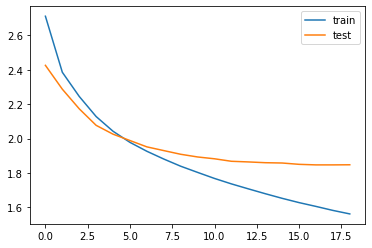

In [69]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

## 인퍼런스 모델 구현하기

테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개 사전을 아래와 같이 미리 준비해둡니다.

In [70]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 합니다.

훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비했습니다.

그러나 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에 부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 합니다. 이때는 인코더 모델과 디코더 모델을 분리해서 설계합니다.

In [72]:
# 인코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape = (hidden_size, ))
decoder_state_input_c = Input(shape = (hidden_size, ))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(Initial state)를 이전 시점의 상태로 사용. 
# 이는 뒤의 함수 decode_sequence()에서 구현합니다.
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셸 상태인 state_h와 state_c를 버리지 않습니다.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

어텐션 매커니즘을 사용하는 출력층을 설계해줍니다.

In [73]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape = (text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)

인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들어줍니다.

In [77]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tar_word_to_index['sostoken']
    
    stop_condition = False
    decoded_sentence = ""
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]
        
        if sampled_token != 'eostoken':
            decoded_sentence += ' ' + sampled_token
        
        # <EOS>에 도달하거나 최대 길이를 넘으면 중단
        if sampled_token == 'eostoken' or len(decoded_sentence.split()) >= summary_max_len - 1:
            stop_condition = True
        
        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros([1, 1])
        target_seq[0, 0] = sampled_token_index
        
        # 상태 업데이트
        e_h, e_c = h, c
    
    return decoded_sentence

## 모델 테스트하기

테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 확인하는 것이 좋습니다. 주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들어보겠습니다. 함수를 만들 때, Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외시키고 Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력해서 제외시키도록 만들겠습니다.

In [75]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        if i != 0:
            temp = temp + src_index_to_word[i] + ' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ""
    for i in input_seq:
        if i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']:
            temp = temp + tar_index_to_word[i] + ' '
    return temp

테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교해보겠습니다.

In [78]:
for i in range(50, 100):
    print("원문 : ", seq2text(encoder_input_test[i]))
    print("실제 요약 : ", seq2summary(decoder_input_test[i]))
    print("예측 요약 : ", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  great heavy chewer long lasting dogs love second one purchased seems one come 
실제 요약 :  big chewer loves it 
예측 요약 :   great product


원문 :  excellent yummy everyone one loved quick shipping product arrived fine condition makes terrific gift 
실제 요약 :  excellent product 
예측 요약 :   great product


원문 :  great gum chew hours still tastes great bad widely available used 
실제 요약 :  minty sweet twist rocks 
예측 요약 :   great gum


원문 :  first discovered pasta nyc restaurant first time pasta gluten free diet tried mom dish someone knows real thing tastes like absolutely amazed pasta gluten free actually preferred regular pasta give heavy feeling eating great basically recipe eating gluten free order case skip gluten free pastas try promise amazed 
실제 요약 :  best gluten free pasta period 
예측 요약 :   great pasta


원문 :  dogs bark every morning get greenie treat addicted dogs bit pricey order amazon keep addiction use two different sizes greenies teenie size good want one give size larger get a

예측 요약 :   great tea


원문 :  two year dogs like prone major tartar build teeth helped made breath better never expected polish teeth perfectly made bad condition bad 
실제 요약 :  dogs liked em 
예측 요약 :   cet chews


원문 :  recommended vets seen healthy clean teeth dog loves cut half though eats whole one tummy like sensitive stomach though 
실제 요약 :  dog loves them 
예측 요약 :   great product


원문 :  gold delicious organic product healthy preparation quick simple make also add another cups sprouted quinoa make dish larger good neighbors loved 
실제 요약 :  the best 
예측 요약 :   great product


원문 :  delivery fast best coffee lovers great tasting coffee would recommend everyone excellent gift coffee drinker 
실제 요약 :  yumm coffee 
예측 요약 :   great coffee


원문 :  creamer fine creamers exploded box problem break open left whole box covered sticky go hand wash putting staff clients simply irritating 
실제 요약 :  milk 
예측 요약 :   not what expected


원문 :  first time tried brand love tried vita coco brands ok ta

오...... 많은 결과를 출력해보았는데, 조금 어색한 요약도 조금 보이지만 잘 맞는 요약도 보이기도 합니다. 어떤 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 하기도 하고있습니다. 

성능을 개선하기 위해서는 seq2seq와 어텐션 자체의 조합을 좀 더 좋게 수정하는 방법도 있고, 빔 서치(beam search), 사전 훈련된 워드 임베딩(pre-trained word embedding), 또는 인코더-디코더 자체의 구조를 새로이 변경하는 트랜스포머(Transformer)와 같은 여러 개선 방안들이 존재합니다. 


<br/>

---


> 번외 - 추출적 요약 해보기

지금까지 추상적 요약을 살펴보았습니다. 이번에는 한번 추출적 요약도 살펴봅시다.

패키지 `Summa`에서는 추출적 요약을 위한 모듈인 `summarize`를 제공하고 있어 아주 간단하게 실습을 해볼 수 있습니다. 영화 매트릭스의 시놉시스를 요약해보면서 summarize를 한번 사용해봅시다!


### 패키지 설치

먼저 아래 명령어를 입력하여 패키지를 설치해줍니다.

```bash
$ pip install summa
```

### 데이터 다운로드하기

In [80]:
import requests
from summa.summarizer import summarize

매트릭스 시놉시스를 불ㄹ러옵시다.

In [81]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

이제 text에는 매트릭스 시놉시스가 문자열로 저장되어져 있어요. 출력 결과가 아주 길기 때문에 일부만 출력해보고, 잘 저장이 되었는지 확인해볼게요.

In [82]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### summarize 사용하기

`Summa`의 `summarize()`의 인자로 사용되는 값들에 대해서 가볍게 살펴봅시다.

- text(str) : 요약할 텍스트
- ratio (float, optional) : 요약문 원본에서 선택되는 문장 비율. 0~1사이의 값
- words (int or None, optional) : 출력에 포함할 단어의 수. 만약 ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
- split (bool, optional) : True면 문장 list, False는 조인된 문자열을 반환

Summa의 Summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행합니다. 그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있습니다. 비율을 적게 주어서 요약문으로 선택되는 문장의 갯수를 줄여봅시다. 원문의 0.005%만을 출력하도록 설정했습니다.

In [83]:
print("Summary")
print(summarize(text, ratio = 0.005))

Summary
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


만약 리스트로 출력 결과를 받고 싶다면 split 인자의 값을 True로 하면 돼요.


In [84]:
print("Summary")
print(summarize(text, ratio = 0.005, split = True))

Summary
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


단어 수로 요약문의 크기를 조절할수도 있습니다. 50개만 선택해봅시다.

In [85]:
print("Summary")
print(summarize(text, words=50))

Summary
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


지금까지 텍스트 요약에 대해서 알아보았습니다. :)

